In [956]:
import pickle
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cdo
from scipy.spatial import KDTree

SYNOP are stations measurements, TEMP radiosondes and dropsondes, AIREP aircrafts, PILOT ballon observations, DRIBU are buoys
d[5,:] are my runs, d[0,:] Ariannas

## Global Verification 

In [1059]:
urb_12_synop = xr.open_dataset('./urb_12/testurb_12hSYNOP.nc')
urb_24_synop = xr.open_dataset('./urb_24/testurb_24hSYNOP.nc')

op_12_synop = xr.open_dataset('./op_12/testop_12hSYNOP.nc')
op_24_synop = xr.open_dataset('./op_24/testop_24hSYNOP.nc')


urb_12_pilot = xr.open_dataset('./urb_12/testurb_12hPILOT.nc')
urb_24_pilot = xr.open_dataset('./urb_24/testurb_24hPILOT.nc')

op_12_pilot = xr.open_dataset('./op_12/testop_12hPILOT.nc')
op_24_pilot = xr.open_dataset('./op_24/testop_24hPILOT.nc')

urb_12_temp = xr.open_dataset('./urb_12/testurb_12hTEMP.nc')
urb_24_temp = xr.open_dataset('./urb_24/testurb_24hTEMP.nc')

op_12_temp = xr.open_dataset('./op_12/testop_12hTEMP.nc')
op_24_temp = xr.open_dataset('./op_24/testop_24hTEMP.nc')

In [1060]:
urb_12_synop_modified = urb_12_synop.copy()
op_12_synop_modified = op_12_synop.copy()

urb_12_synop_modified.attrs.pop('history', None)
op_12_synop_modified.attrs.pop('history', None)

xr.testing.assert_identical(urb_12_synop_modified, op_12_synop_modified)
print('The datasets are equal, excluding history')

The datasets are equal, excluding history


In [1061]:
sns.set_style('whitegrid')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


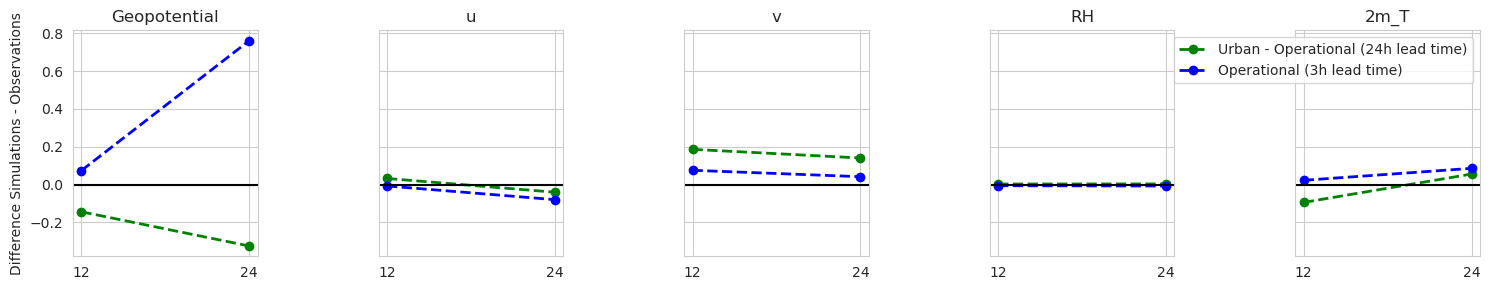

In [871]:
x = np.unique(urb_12_synop.varno)
varno = ['Geopotential', 'u', 'v', 'RH', '2m_T']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_synop,
    'urban_12h': urb_12_synop,
}

dataset_24 = {
    'operational_24h': op_24_synop,
    'urban_24h': urb_24_synop,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_synop}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_synop}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='b', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


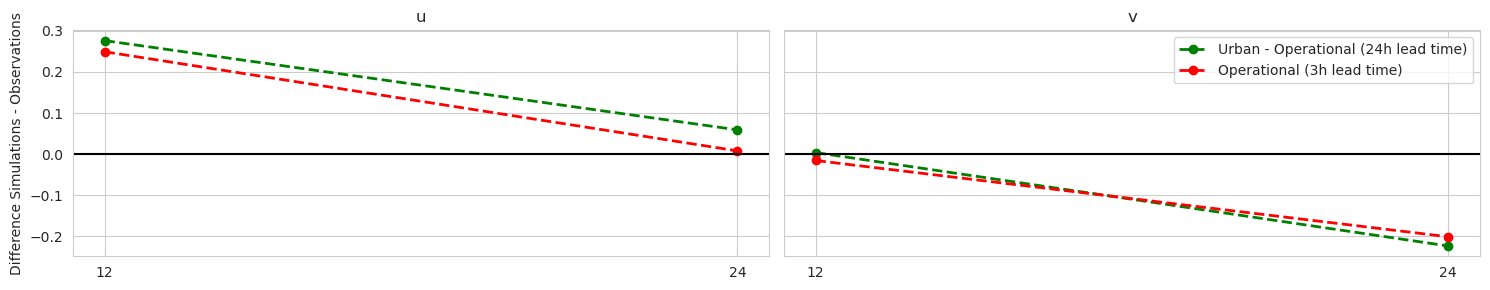

In [1073]:
x = np.unique(urb_12_pilot.varno)
varno = ['u', 'v']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_pilot,
    'urban_12h': urb_12_pilot,
}

dataset_24 = {
    'operational_24h': op_24_pilot,
    'urban_24h': urb_24_pilot,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_pilot}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_pilot}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='r', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


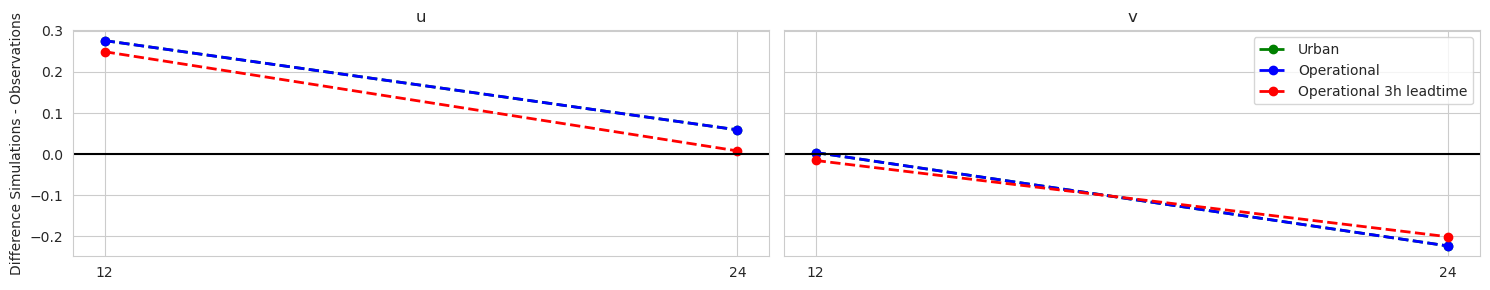

In [1072]:
#just to check if i set up the loop above correct

x = np.unique(urb_12_pilot.varno)
varno = ['u', 'v']

fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_pilot,
    'urban_12h': urb_12_pilot,
}

dataset_24 = {
    'operational_24h': op_24_pilot,
    'urban_24h': urb_24_pilot,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_pilot}
dataset_24h_3hlt = {'operational_24h_3hlt': op_24_pilot}

for i, x_value in enumerate(x):
    urb_12_data = (dataset_12['urban_12h'].veri_data[5, :].where(dataset_12['urban_12h'].varno == x_value).mean() -
                   dataset_12['urban_12h'].obs.where(dataset_12['urban_12h'].varno == x_value).mean())
    urb_24_data = (dataset_24['urban_24h'].veri_data[5, :].where(dataset_24['urban_24h'].varno == x_value).mean() -
                   dataset_24['urban_24h'].obs.where(dataset_24['urban_24h'].varno == x_value).mean())

    op_12_data = (dataset_12['operational_12h'].veri_data[5, :].where(dataset_12['operational_12h'].varno == x_value).mean() -
                  dataset_12['operational_12h'].obs.where(dataset_12['operational_12h'].varno == x_value).mean())
    op_24_data = (dataset_24['operational_24h'].veri_data[5, :].where(dataset_24['operational_24h'].varno == x_value).mean() -
                  dataset_24['operational_24h'].obs.where(dataset_24['operational_24h'].varno == x_value).mean())

    op_12h_3hlt = (dataset_12h_3hlt['operational_12h_3hlt'].veri_data[0, :].where(dataset_12h_3hlt['operational_12h_3hlt'].varno == x_value).mean() -
                  dataset_12h_3hlt['operational_12h_3hlt'].obs.where(dataset_12h_3hlt['operational_12h_3hlt'].varno == x_value).mean())

    op_24h_3hlt = (dataset_24h_3hlt['operational_24h_3hlt'].veri_data[0, :].where(dataset_24h_3hlt['operational_24h_3hlt'].varno == x_value).mean() -
                  dataset_24h_3hlt['operational_24h_3hlt'].obs.where(dataset_24h_3hlt['operational_24h_3hlt'].varno == x_value).mean())

    ax[i].plot([1, 2], [urb_12_data, urb_24_data], marker='o', color='g', linestyle='--', linewidth=2, label='Urban')
    ax[i].plot([1, 2], [op_12_data, op_24_data], marker='o', color='b', linestyle='--', linewidth=2, label='Operational')
    ax[i].plot([1, 2], [op_12h_3hlt, op_24h_3hlt], marker='o', color='r', linestyle='--', linewidth=2, label='Operational 3h leadtime')

    ax[i].set_title(varno[i])
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()
plt.show()


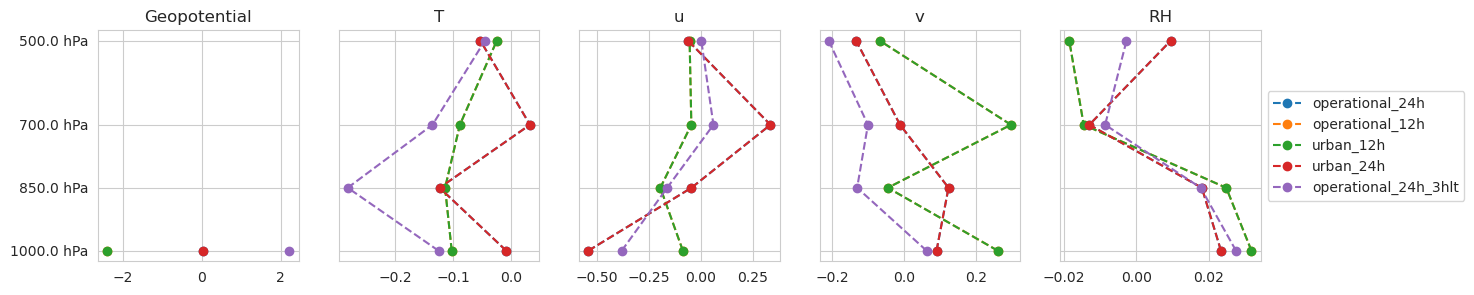

In [841]:
p_levels = [100000, 85000, 70000, 50000]
x = np.unique(op_12_temp.varno)
varno = ['Geopotential', 'T', 'u', 'v', 'RH']

fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

datasets = {
    'operational_24h': op_24_temp,
    'operational_12h': op_12_temp,
    'urban_12h': urb_12_temp,
    'urban_24h': urb_24_temp,
}

dataset_3h = {'operational_24h_3hlt': op_24_temp}

for i, x_value in enumerate(x):
    for label, data in datasets.items():
        diff_data = [data.veri_data[5, :].where((data.plevel == p) & (data.varno == x_value)).mean() - data.obs.where((data.plevel == p) & (data.varno == x_value)).mean() for p in p_levels]
        ax[i].plot(diff_data, p_levels, marker='o', linestyle='--', label=label)

    for label, data in dataset_3h.items():
        diff_data = [data.veri_data[0, :].where((data.plevel == p) & (data.varno == x_value)).mean() - data.obs.where((data.plevel == p) & (data.varno == x_value)).mean() for p in p_levels]
        ax[i].plot(diff_data, p_levels, marker='o', linestyle='--', label=label)
        

    ax[i].set_title(varno[i])
    ax[i].set_yticks(p_levels)
    ax[i].set_yticklabels([f'{p / 100} hPa' for p in p_levels])



plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## European Verification

xr.sel would be a more elegant way to slice the data, but it doesn't work, since lat lon are non-indexed multidimensional coordinates. It is discussed here
https://github.com/pydata/xarray/issues/2028

In [933]:
urb_12_pilot_europe = urb_12_pilot.where((urb_12_pilot.lat >= 20) & (urb_12_pilot.lat <= 80) & (urb_12_pilot.lon >= -10) & (urb_12_pilot.lon <= 30), drop=True)
urb_24_pilot_europe = urb_24_pilot.where((urb_24_pilot.lat >= 20) & (urb_24_pilot.lat <= 80) & (urb_24_pilot.lon >= -10) & (urb_24_pilot.lon <= 30), drop=True)

op_12_pilot_europe = op_12_pilot.where((op_12_pilot.lat >= 20) & (op_12_pilot.lat <= 80) & (op_12_pilot.lon >= -10) & (op_12_pilot.lon <= 30), drop=True)
op_24_pilot_europe = op_24_pilot.where((op_24_pilot.lat >= 20) & (op_24_pilot.lat <= 80) & (op_24_pilot.lon >= -10) & (op_24_pilot.lon <= 30), drop=True)

urb_12_synop_europe = urb_12_synop.where((urb_12_synop.lat >= 20) & (urb_12_synop.lat <= 80) & (urb_12_synop.lon >= -10) & (urb_12_synop.lon <= 30), drop=True)
urb_24_synop_europe = urb_24_synop.where((urb_24_synop.lat >= 20) & (urb_24_synop.lat <= 80) & (urb_24_synop.lon >= -10) & (urb_24_synop.lon <= 30), drop=True)

op_12_synop_europe = op_12_synop.where((op_12_synop.lat >= 20) & (op_12_synop.lat <= 80) & (op_12_synop.lon >= -10) & (op_12_synop.lon <= 30), drop=True)
op_24_synop_europe = op_24_synop.where((op_24_synop.lat >= 20) & (op_24_synop.lat <= 80) & (op_24_synop.lon >= -10) & (op_24_synop.lon <= 30), drop=True)

urb_12_temp_europe = urb_12_temp.where((urb_12_temp.lat >= 20) & (urb_12_temp.lat <= 80) & (urb_12_temp.lon >= -10) & (urb_12_temp.lon <= 30), drop=True)
urb_24_temp_europe = urb_24_temp.where((urb_24_temp.lat >= 20) & (urb_24_temp.lat <= 80) & (urb_24_temp.lon >= -10) & (urb_24_temp.lon <= 30), drop=True)

op_12_temp_europe = op_12_temp.where((op_12_temp.lat >= 20) & (op_12_temp.lat <= 80) & (op_12_temp.lon >= -10) & (op_12_temp.lon <= 30), drop=True)
op_24_temp_europe = op_24_temp.where((op_24_temp.lat >= 20) & (op_24_temp.lat <= 80) & (op_24_temp.lon >= -10) & (op_24_temp.lon <= 30), drop=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


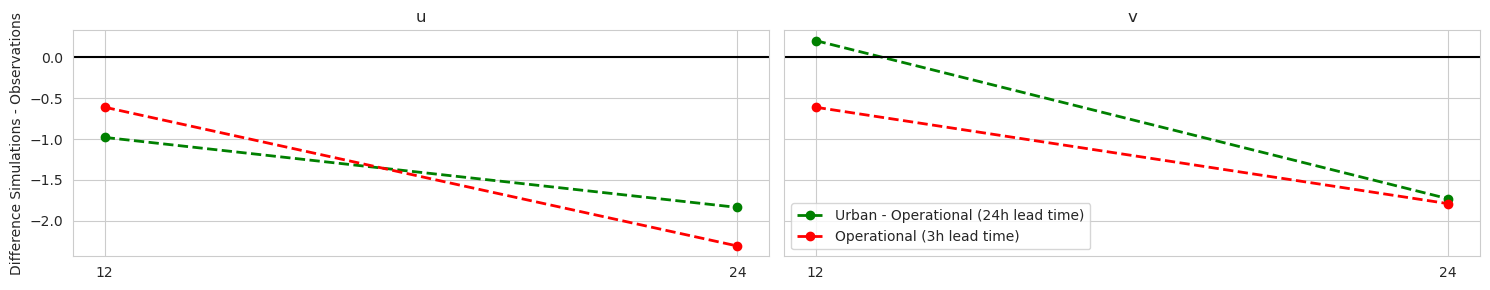

In [1074]:
x = np.unique(urb_12_pilot_europe.varno)
varno = ['u', 'v']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_pilot_europe,
    'urban_12h': urb_12_pilot_europe,
}

dataset_24 = {
    'operational_24h': op_24_pilot_europe,
    'urban_24h': urb_24_pilot_europe,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_pilot_europe}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_pilot_europe}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='r', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


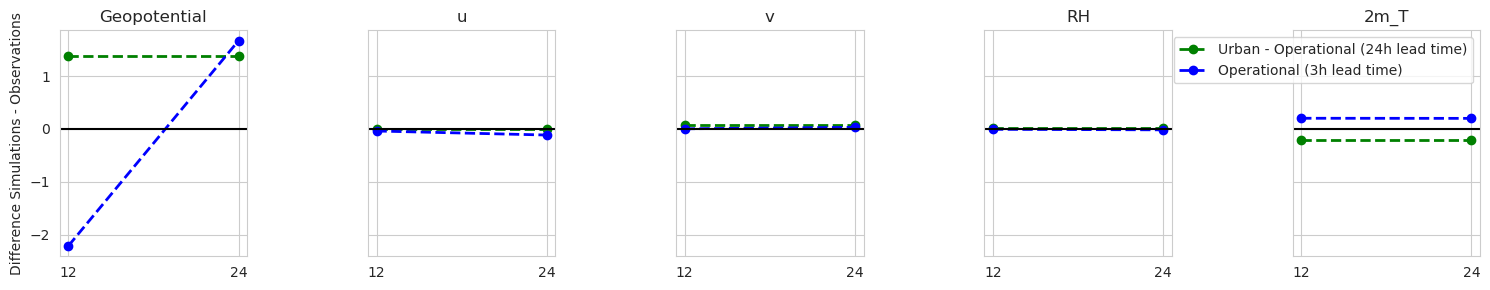

In [1015]:
x = np.unique(urb_12_synop_europe.varno)
varno = ['Geopotential', 'u', 'v', 'RH', '2m_T']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_synop_europe,
    'urban_12h': urb_12_synop_europe,
}

dataset_24 = {
    'operational_24h': op_24_synop_europe,
    'urban_24h': urb_12_synop_europe,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_synop_europe}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_synop_europe}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='b', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


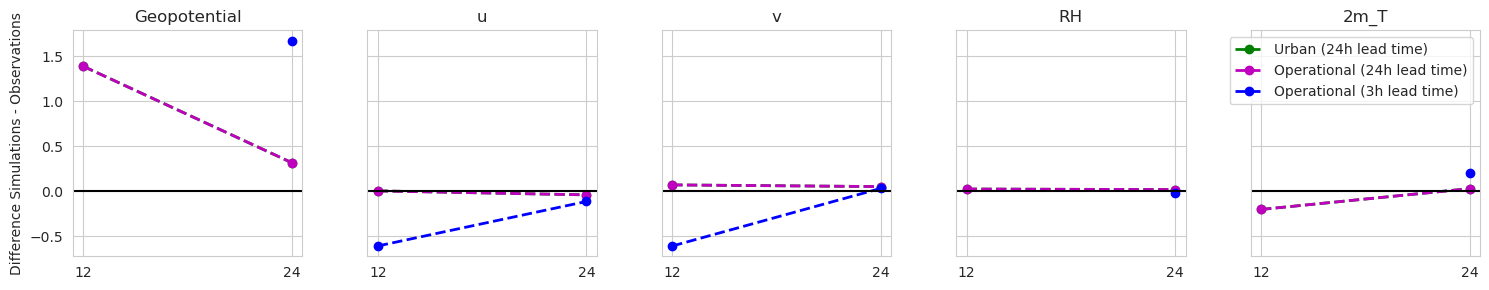

In [1066]:
x = np.unique(urb_12_synop_europe.varno)
varno = ['Geopotential', 'u', 'v', 'RH', '2m_T']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12_urban = {'urban_12h': urb_12_synop_europe,}
dataset_24_urban = {'urban_24h': urb_24_synop_europe,}
dataset_12_op = {'op_12h': op_12_synop_europe,}
dataset_24_op = {'op_24h': op_24_synop_europe,}
dataset_12h_3hlt = {'operational_12h_3hlt': op_12_synop_europe}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_synop_europe}

for i, x_value in enumerate(x):
    for label, data in dataset_12_urban.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24_urban.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban (24h lead time)')

    for label, data in dataset_12_op.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24_op.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='m', linestyle='--', linewidth=2, label='Operational (24h lead time)')
    
    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='b', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


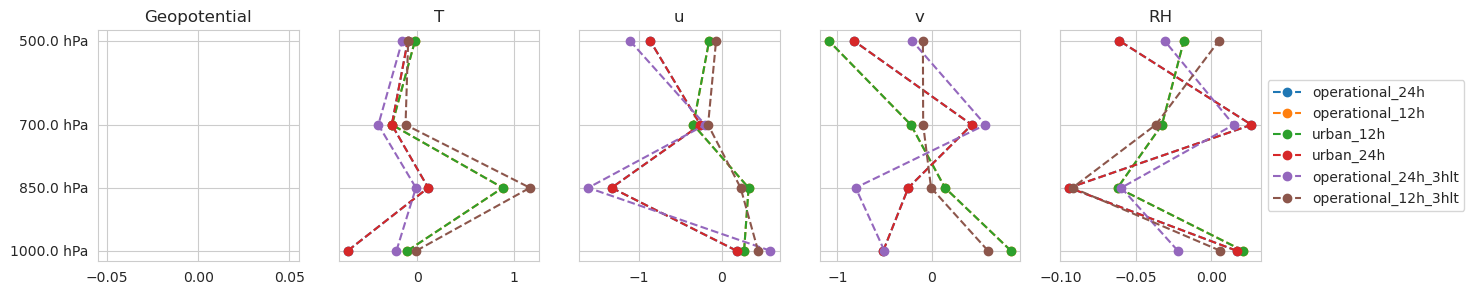

In [1076]:
p_levels = [100000, 85000, 70000, 50000]
x = np.unique(op_12_temp.varno)
varno = ['Geopotential', 'T', 'u', 'v', 'RH']

fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

datasets = {
    'operational_24h': op_24_temp_europe,
    'operational_12h': op_12_temp_europe,
    'urban_12h': urb_12_temp_europe,
    'urban_24h': urb_24_temp_europe,
}

dataset_3h = {'operational_24h_3hlt': op_24_temp_europe,
             'operational_12h_3hlt': op_12_temp_europe,}

for i, x_value in enumerate(x):
    for label, data in datasets.items():
        diff_data = [data.veri_data[5, :].where((data.plevel == p) & (data.varno == x_value)).mean() - data.obs.where((data.plevel == p) & (data.varno == x_value)).mean() for p in p_levels]
        ax[i].plot(diff_data, p_levels, marker='o', linestyle='--', label=label)

    for label, data in dataset_3h.items():
        diff_data = [data.veri_data[0, :].where((data.plevel == p) & (data.varno == x_value)).mean() - data.obs.where((data.plevel == p) & (data.varno == x_value)).mean() for p in p_levels]
        ax[i].plot(diff_data, p_levels, marker='o', linestyle='--', label=label)
        

    ax[i].set_title(varno[i])
    ax[i].set_yticks(p_levels)
    ax[i].set_yticklabels([f'{p / 100} hPa' for p in p_levels])



plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Urban Grids Verification

In [988]:
ds_det = xr.open_dataset('../det_data_all_2022/fc_DOM01_0001_NU_urban_grid.nc')

In [989]:
ds_det["clat"] = np.degrees(ds_det["clat"])
ds_det["clon"] = np.degrees(ds_det["clon"])

In [1078]:
class model_kdtree(object):
    def __init__(self):
        model_ds = xr.open_dataset('./urb_12/testurb_12hPILOT.nc')
        self.model_ds = model_ds
        self.kdtree = {}
        self.kdtree = KDTree(np.asarray([self.model_ds.lat.values.flatten(),
                                         self.model_ds.lon.values.flatten()]).T)
    
    def query(self, lat_az0, lon_az0):
        distances, indices1d = self.kdtree.query(np.asarray([lat_az0, lon_az0]).T)
        return indices1d

In [1079]:
#initialize 
tree_icon = model_kdtree()
tree_icon.kdtree

In [1080]:
indices_cities_ens = tree_icon.query(np.asarray(ds_det.clat.values), np.asarray(ds_det.clon.values))

In [1081]:
urb_12_pilot_cities = urb_12_pilot.isel(d_body=indices_cities_ens)
op_12_pilot_cities = op_12_pilot.isel(d_body=indices_cities_ens)

In [1082]:
class model_kdtree(object):
    def __init__(self):
        model_ds = xr.open_dataset('./urb_24/testurb_24hPILOT.nc')
        self.model_ds = model_ds
        self.kdtree = {}
        self.kdtree = KDTree(np.asarray([self.model_ds.lat.values.flatten(),
                                         self.model_ds.lon.values.flatten()]).T)
    
    def query(self, lat_az0, lon_az0):
        distances, indices1d = self.kdtree.query(np.asarray([lat_az0, lon_az0]).T)
        return indices1d

In [1083]:
#initialize 
tree_icon = model_kdtree()
tree_icon.kdtree

In [1084]:
indices_cities_ens = tree_icon.query(np.asarray(ds_det.clat.values), np.asarray(ds_det.clon.values))

In [1085]:
urb_24_pilot_cities = urb_24_pilot.isel(d_body=indices_cities_ens)
op_24_pilot_cities = op_24_pilot.isel(d_body=indices_cities_ens)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


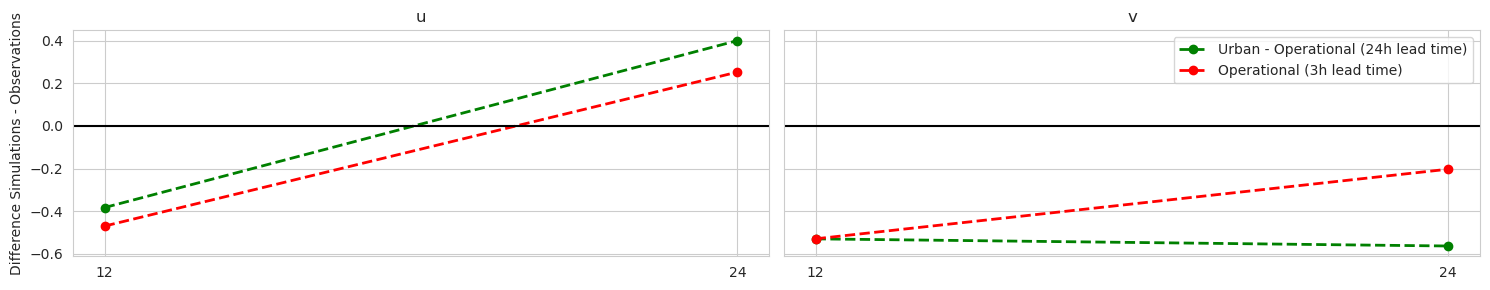

In [1086]:
x = np.unique(urb_12_pilot_cities.varno)
varno = ['u', 'v']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_pilot_cities,
    'urban_12h': urb_12_pilot_cities,
}

dataset_24 = {
    'operational_24h': op_24_pilot_cities,
    'urban_24h': urb_24_pilot_cities,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_pilot_cities}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_pilot_cities}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='r', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


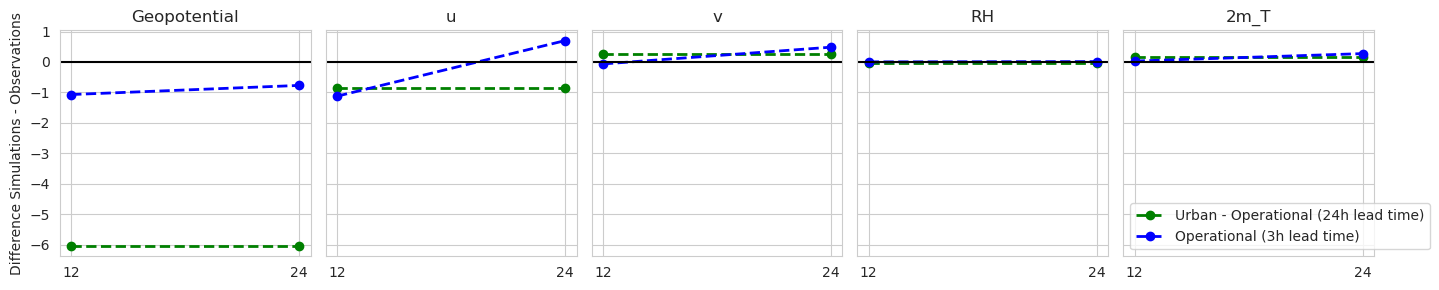

In [1017]:
x = np.unique(urb_12_synop_cities.varno)
varno = ['Geopotential', 'u', 'v', 'RH', '2m_T']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12 = {
    'operational_12h': op_12_synop_cities,
    'urban_12h': urb_12_synop_cities,
}

dataset_24 = {
    'operational_24h': op_24_synop_cities,
    'urban_24h': urb_12_synop_cities,
}

dataset_12h_3hlt = {'operational_12h_3hlt': op_12_synop_cities}
dataset_24h_3hlt = {'operational_12h_3hlt': op_24_synop_cities}

for i, x_value in enumerate(x):
    for label, data in dataset_12.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban - Operational (24h lead time)')

    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='b', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


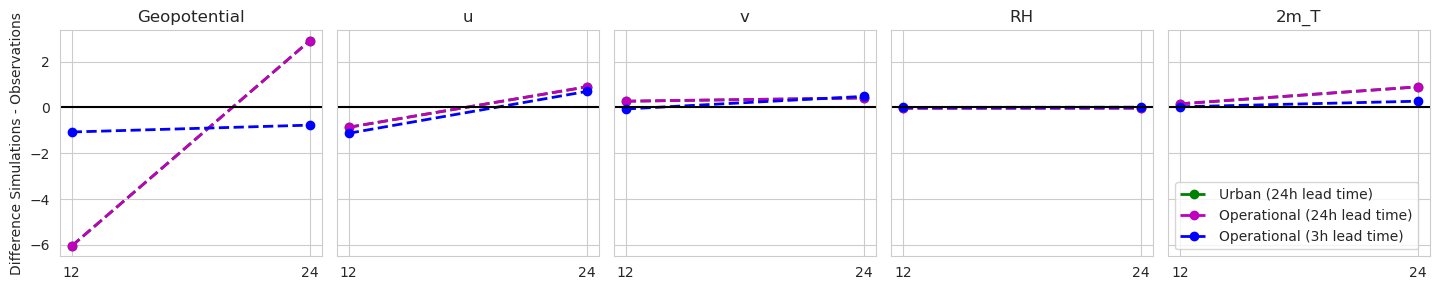

In [1022]:
x = np.unique(urb_12_synop_cities.varno)
varno = ['Geopotential', 'u', 'v', 'RH', '2m_T']


fig, ax = plt.subplots(1, len(x), figsize=(15, 3), sharey=True)

dataset_12_urban = {'urban_12h': urb_12_synop_cities,}
dataset_24_urban = {'urban_24h': urb_24_synop_cities,}
dataset_12_op = {'op_12h': op_12_synop_cities,}
dataset_24_op = {'op_24h': op_24_synop_cities,}
dataset_12h_3hlt = {'operational_12h_3hlt': op_12_synop_cities}
dataset_24h_3hlt = {'operational_24h_3hlt': op_24_synop_cities}

for i, x_value in enumerate(x):
    for label, data in dataset_12_urban.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24_urban.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='g', linestyle='--', linewidth=2, label='Urban (24h lead time)')

    for label, data in dataset_12_op.items():
        diff_data_12 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_12 = diff_data_12.astype(float).item()
    for label, data in dataset_24_op.items():
        diff_data_24 = (data.veri_data[5, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
        diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='m', linestyle='--', linewidth=2, label='Operational (24h lead time)')
    
    for label, data in dataset_12h_3hlt.items():
        for label, data in dataset_12.items():
            diff_data_12 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_12 = diff_data_12.astype(float).item()
        for label, data in dataset_24h_3hlt.items():
            diff_data_24 = (data.veri_data[0, :].where(data.varno == x_value).mean() -
                        data.obs.where(data.varno == x_value).mean())
            diff_numeric_24 = diff_data_24.astype(float).item()
    
    ax[i].plot([1, 2], [diff_numeric_12, diff_numeric_24], marker='o', color='b', linestyle='--', linewidth=2, label='Operational (3h lead time)')
        

    ax[i].set_title(varno[i])
#    ax[i].set_xlabel('Lead Time')
    ax[-1].legend()
    ax[i].set_xticks([1, 2])
    ax[i].set_xticklabels(['12', '24'])
    ax[i].grid(True)
    ax[i].axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('Difference Simulations - Observations')

plt.tight_layout()

plt.show()
